# Day9

In [1]:
# revise linear regression
# revise ML basics, variables and split
# overview of categorical data
# logistic regression

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
df = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0


In [95]:
# df.drop(labels=['User ID'], axis=1, inplace=True)
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,1,42,121315,0
1,17782313,1,53,67214,0
2,14603818,0,59,111005,0
3,18188198,0,39,53414,0
4,19357305,1,39,114285,0


In [96]:
X = df.iloc[:, [2,3]].values
y = df.iloc[: ,4].values

In [97]:
X[:10] # independent variables

array([[    42, 121315],
       [    53,  67214],
       [    59, 111005],
       [    39,  53414],
       [    39, 114285],
       [    39, 107458],
       [    20,  85582],
       [    59, 148335],
       [    48,  80579],
       [    42, 114204]])

In [98]:
y[:15] # target / dependent variable

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [99]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [100]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

In [1]:
train_X.shape

NameError: name 'train_X' is not defined

In [102]:
test_X.shape

(80, 2)

In [80]:
sc = StandardScaler()

In [81]:
#train_X = sc.fit_transform(train_X)
#test_X = sc.transform(test_X)

/Users/Ganesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [113]:
train_X.shape

(320, 2)

In [114]:
test_X.shape

(80, 2)

In [115]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
pred_y = model.predict(test_X)

In [117]:
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
test_y

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)
# used for describing the performance of the model... actual vs predicted values

array([[48,  0],
       [32,  0]])

In [122]:
import seaborn as sns
wine = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/Wine.csv')
wine.head()

/Users/Ganesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Ganesh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13,2,6,13,125,1,0,0.71,3,8,1,1,1004,1
1,11,6,4,10,147,3,2,0.66,4,2,2,1,681,1
2,11,4,3,13,89,2,4,0.36,2,3,1,3,946,1
3,15,6,6,11,151,4,4,0.54,5,11,1,3,319,1
4,12,2,3,13,146,0,1,0.35,2,7,1,3,1640,1


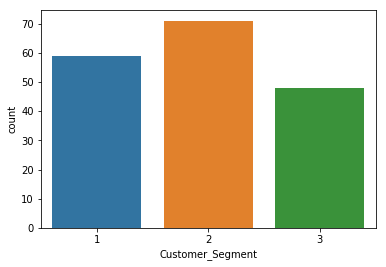

In [123]:
sns.countplot(wine.Customer_Segment, label='Count')

In [125]:
# df.values[start:stop:step, start:stop:step]
features = wine.values[:, :13]  # X

In [127]:
target = wine.values[:, 13] # y

In [167]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.3, random_state=5)

In [168]:
train_X.shape

(124, 13)

In [169]:
test_X.shape

(54, 13)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [171]:
lr = LogisticRegression()

In [172]:
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
pred_y = lr.predict(test_X)

In [174]:
accuracy_score(test_y, pred_y)

0.37037037037037035

In [175]:
errors = abs(pred_y - test_y)

In [176]:
errors

array([1., 1., 1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 2., 1., 1., 1., 1., 1., 0.,
       1., 0., 2.])

In [177]:
mean_abs_per_err = (errors/test_y) * 100

In [179]:
accuracy = 100 - np.mean(mean_abs_per_err)

In [181]:
accuracy

46.604938271604944

In [183]:
df = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/breast-cancer-wisconsin-data.csv')

In [186]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [187]:
# M --> Malignant, B --> Benign

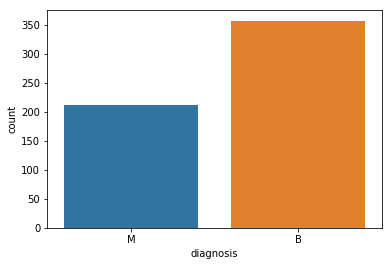

In [188]:
sns.countplot(df['diagnosis'], label='COunt')

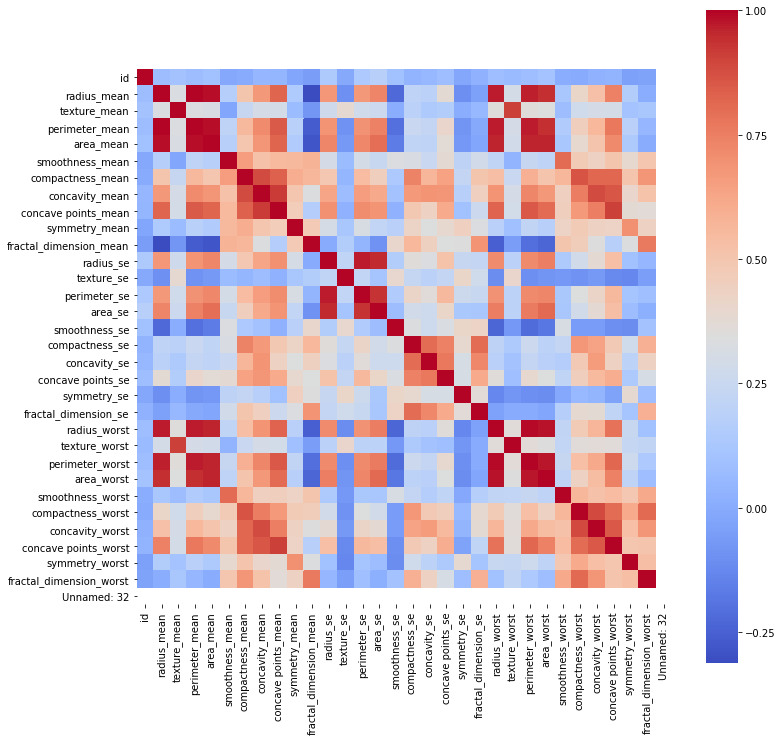

In [190]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square=True, cmap='coolwarm')